# Setup

### Import relevant packages

In [1]:
# general packages
import os
import pandas as pd
from tqdm.auto import tqdm

In [2]:
# packages for the YAMl file
import yaml

In [3]:
# packages for scaling the data
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

In [4]:
# packages for exporting PCA model
from joblib import dump

### Set the maximum output number of columns and rows

In [5]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

### Load in the '.py' file containg the functions used in this notebook¶

In [6]:
%load_ext autoreload
%autoreload 1
%aimport pca

import pca

# ---------------------------------------------------------------------------------------------------------------

# Read in the variables from the YAML config file

In [7]:
# read in YAML configuration file
with open("../../Config_files/config.yaml", "r") as variables:
    config_variables = yaml.load(variables, Loader=yaml.FullLoader)

#### Read in the data directory filepath

In [8]:
data_directory = config_variables["data_directory"]

#### Read in the directory to output the PCA model to

In [9]:
model_directory = config_variables["model_directory"]

#### Read random seed

In [10]:
random_seed = config_variables["random_seed"]

#### Read the time intervals

In [11]:
train_intervals_list = config_variables["train_intervals_list"]

#### Read list of feature numbers

In [12]:
num_pca_features_list = config_variables["num_pca_features_list"]

# ---------------------------------------------------------------------------------------------------------------

# Read in the processed data

In [13]:
processed_data = pd.read_csv(os.path.join(data_directory, 'processed_data.csv'))

In [14]:
processed_data.shape

(4510, 1464)

In [15]:
processed_data.head()

,date,trading_volume,trades_per_minute,volatility,bid_and_ask_spread,bid_and_ask_sum_asks,bid_and_ask_sum_bids,time_between_blocks,block_size_votes,rank_bit_x,rank_bitfinex,rank_bitstamp,rank_btce,rank_coinbase,rank_itbit,rank_kraken,rank_mtgox,rank_okcoin,rank_others,marketcap3sma,marketcap7sma,marketcap14sma,marketcap30sma,marketcap90sma,marketcap3ema,marketcap7ema,marketcap14ema,marketcap30ema,marketcap90ema,marketcap3wma,marketcap7wma,marketcap14wma,marketcap30wma,marketcap90wma,marketcap3trx,marketcap7trx,marketcap14trx,marketcap30trx,marketcap90trx,marketcap3mom,marketcap7mom,marketcap14mom,marketcap30mom,marketcap90mom,marketcap3std,marketcap7std,marketcap14std,marketcap30std,marketcap90std,marketcap3var,...,euro_19_business_employment_expectation,germany_business_employment_expectation,france_business_employment_expectation,turkey_business_employment_expectation,uk_business_employment_expectation,italy_business_employment_expectation,belgium_business_employment_expectation,denmark_business_employment_expectation,sweden_business_employment_expectation,germany_percent_housholds_w_internet,france_percent_housholds_w_internet,turkey_percent_housholds_w_internet,uk_percent_housholds_w_internet,italy_percent_housholds_w_internet,belgium_percent_housholds_w_internet,denmark_percent_housholds_w_internet,sweden_percent_housholds_w_internet,denmark_gov_debt_all,sweden_gov_debt_all,euro_area_percent_afford_unexpected_expenses,euro_19_percent_afford_unexpected_expenses,germany_percent_afford_unexpected_expenses,france_percent_afford_unexpected_expenses,turkey_percent_afford_unexpected_expenses,uk_percent_afford_unexpected_expenses,italy_percent_afford_unexpected_expenses,belgium_percent_afford_unexpected_expenses,denmark_percent_afford_unexpected_expenses,sweden_percent_afford_unexpected_expenses,germany_trust_in_legal_system,france_trust_in_legal_system,turkey_trust_in_legal_system,uk_trust_in_legal_system,italy_trust_in_legal_system,belgium_trust_in_legal_system,denmark_trust_in_legal_system,sweden_trust_in_legal_system,musk_num_tweets,musk_num_pos_tweets,musk_num_neg_tweets,musk_num_neut_tweets,musk_percent_pos,musk_percent_neg,musk_percent_neut,cos_dotw,sin_dotw,cos_dotm,sin_dotm,shifted_1,binary_price_change_1
0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.8,-18.8,-18.7,NaN,-56.1,-22.0,-10.4,-30.6,-51.0,79.0,69.0,30.0,77.0,53.0,67.0,83.0,86.0,NaN,NaN,NaN,32.4,32.7,33.5,56.5,30.2,31.7,25.3,32.2,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000e+00,0.841254,0.540641,NaN,0
1,2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.8,-18.8,-18.7,NaN,-56.1,-22.0,-10.4,-30.6,-51.0,79.0,69.0,30.0,77.0,53.0,67.0,83.0,86.0,NaN,NaN,NaN,32.4,32.7,33.5,56.5,30.2,31.7,25.3,32.2,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,8.660254e-01,0.841254,0.540641,NaN,0
2,2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.8,-18.8,-18.7,NaN,-56.1,-22.0,-10.4,-30.6,-51.0,79.0,69.0,30.0,77.0,53.0,67.0,83.0,86.0,NaN,NaN,NaN,32.4,32.7,33.5,56.5,30.2,31.7,25.3,32.2,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,8.660254e-01,0.841254,0.540641,NaN,0
3,2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.8,-18.8,-18.7,NaN,-56.1,-22.0,-10.4,-30.6,-51.0,79.0,69.0,30.0,77.0,53.0,67.0,83.0,86.0,NaN,NaN,NaN,32.4,32.7,33.5,56.5,30.2,31.7,25.3,32.2,25

In [16]:
processed_data.tail()

,date,trading_volume,trades_per_minute,volatility,bid_and_ask_spread,bid_and_ask_sum_asks,bid_and_ask_sum_bids,time_between_blocks,block_size_votes,rank_bit_x,rank_bitfinex,rank_bitstamp,rank_btce,rank_coinbase,rank_itbit,rank_kraken,rank_mtgox,rank_okcoin,rank_others,marketcap3sma,marketcap7sma,marketcap14sma,marketcap30sma,marketcap90sma,marketcap3ema,marketcap7ema,marketcap14ema,marketcap30ema,marketcap90ema,marketcap3wma,marketcap7wma,marketcap14wma,marketcap30wma,marketcap90wma,marketcap3trx,marketcap7trx,marketcap14trx,marketcap30trx,marketcap90trx,marketcap3mom,marketcap7mom,marketcap14mom,marketcap30mom,marketcap90mom,marketcap3std,marketcap7std,marketcap14std,marketcap30std,marketcap90std,marketcap3var,...,euro_19_business_employment_expectation,germany_business_employment_expectation,france_business_employment_expectation,turkey_business_employment_expectation,uk_business_employment_expectation,italy_business_employment_expectation,belgium_business_employment_expectation,denmark_business_employment_expectation,sweden_business_employment_expectation,germany_percent_housholds_w_internet,france_percent_housholds_w_internet,turkey_percent_housholds_w_internet,uk_percent_housholds_w_internet,italy_percent_housholds_w_internet,belgium_percent_housholds_w_internet,denmark_percent_housholds_w_internet,sweden_percent_housholds_w_internet,denmark_gov_debt_all,sweden_gov_debt_all,euro_area_percent_afford_unexpected_expenses,euro_19_percent_afford_unexpected_expenses,germany_percent_afford_unexpected_expenses,france_percent_afford_unexpected_expenses,turkey_percent_afford_unexpected_expenses,uk_percent_afford_unexpected_expenses,italy_percent_afford_unexpected_expenses,belgium_percent_afford_unexpected_expenses,denmark_percent_afford_unexpected_expenses,sweden_percent_afford_unexpected_expenses,germany_trust_in_legal_system,france_trust_in_legal_system,turkey_trust_in_legal_system,uk_trust_in_legal_system,italy_trust_in_legal_system,belgium_trust_in_legal_system,denmark_trust_in_legal_system,sweden_trust_in_legal_system,musk_num_tweets,musk_num_pos_tweets,musk_num_neg_tweets,musk_num_neut_tweets,musk_percent_pos,musk_percent_neg,musk_percent_neut,cos_dotw,sin_dotw,cos_dotm,sin_dotm,shifted_1,binary_price_change_1
4505,2021-05-03,8455.341969,133.702361,140.935477,2.641400,7.076749e+07,3.884049e+07,8.141667,20.0,0.013197,2273.890488,429.608004,1198.635333,1375.047100,251.796533,461.062539,23.146947,1123.792028,298.032956,1.075468e+12,1.044488e+12,1.012719e+12,1.064377e+12,9.954276e+11,1.069850e+12,1.048454e+12,1.040902e+12,1.045753e+12,9.579448e+11,1.075882e+12,1.056582e+12,1.026709e+12,1.046286e+12,1.039911e+12,1.295,0.079,-0.241,0.235,0.774,4.977142e+10,9.220029e+10,2.920788e+10,-1.755584e+10,4.370610e+11,1.755854e+10,5.661934e+10,9.836650e+10,1.333127e+11,2.243573e+11,7.707561e+19,...,9.5,2.6,15.8,-8.4,-11.9,3.4,11.4,15.3,-2.6,96.0,90.0,91.0,97.0,88.0,91.0,95.0,94.0,0.0,0.0,28.7,28.7,23.5,27.6,26.6,31.1,33.1,26.0,25.6,20.9,5.3,4.5,5.4,5.5,3.6,5.0,7.5,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-8.660254e-01,-0.959493,0.281733,55283.417218,0
4506,2021-05-04,12928.490000,190.094861,187.732074,2.579816,5.045276e+07,4.533306e+07,8.141667,20.0,0.013616,2379.419313,447.921898,1198.635333,1458.092366,251.796533,495.607223,23.146947,1123.792028,375.329754,1.060083e+12,1.046478e+12,1.012488e+12,1.062933e+12,9.993580e+11,1.052044e+12,1.044900e+12,1.040014e+12,1.045010e+12,9.596216e+11,1.055267e+12,1.054020e+12,1.029578e+12,1.044341e+12,1.040764e+12,0.525,0.163,-0.216,0.220,0.767,-4.615643e+10,1.393380e+10,-3.234291e+09,-4.331573e+10,3.537349e+11,3.994718e+10,5.399747e+10,9.814783e+10,1.336484e+11,2.143209e+11,3.989443e+20,...,9.5,2.6,15.8,-8.4,-11.9,3.4,11.4,15.3,-2.6,96.0,90.0,91.0,97.0,88.0,91.0,95.0,94.0,0.0,0.0,28.7,28.7,23.5,27.6,26.6,31.1,33.1,26.0,25.6,20.9,5.3,4.5,5.4,5.5,3.6,5.0,7.5,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-8.660254e-01,-0.959493,0.281733,55395.842503,1
4507,2021-05-05,11404.495772,177.942361,505.884363,2.690450,6.530711e+0

# ---------------------------------------------------------------------------------------------------------------

# Iterate through the intervals and number of features & do PCA on the data

In [17]:
estimator = [['minmax', MinMaxScaler(feature_range=(-1, 1))],
            ]

The original author of the paper that I am implementing made a mistake when runnign the PCA. Instead of transforming his data once the PCA components had been created, he used these components as his proceedures. As a result, the features he used were wrong and give a different result to what they should. To compensate for this, I have specified an option below as to whether you want to fix this mistake in the PCA or not. THis is done by specifying the 'fixed_pca' valiable as True if you want to fix it, or False if you want to continue and use the way the original author did it.

-------------
Time Interval: 2015-08-17 --> 2020-12-31
Dropping the following 'Nan' columns:
 ['crypto_index_open', 'crypto_index_high', 'crypto_index_low', 'crypto_index_close', 'johannesburg_exchange_open', 'johannesburg_exchange_high', 'johannesburg_exchange_low', 'johannesburg_exchange_close', 'denmark_gov_debt_all', 'sweden_gov_debt_all']
[Pipeline] ............ (step 1 of 1) Processing minmax, total=   0.0s


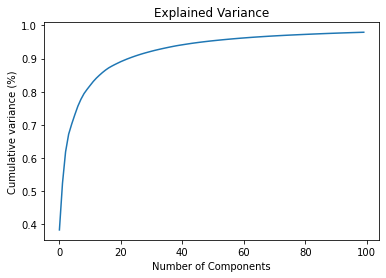

|    |   component_num |   explained_variance |   cumulative_explained_variance |
|---:|----------------:|---------------------:|--------------------------------:|
|  0 |               0 |          0.383025    |                        0.383025 |
|  1 |               1 |          0.14096     |                        0.523985 |
|  2 |               2 |          0.0944851   |                        0.61847  |
|  3 |               3 |          0.0532624   |                        0.671732 |
|  4 |               4 |          0.0307386   |                        0.702471 |
|  5 |               5 |          0.027735    |                        0.730206 |
|  6 |               6 |          0.0261101   |                        0.756316 |
|  7 |               7 |          0.0208146   |                        0.77713  |
|  9 |               9 |          0.0129033   |                        0.807134 |
| 10 |              10 |          0.0118854   |                        0.81902  |
| 11 |          

In [19]:
# iterate through the intervals
for train_start_date, train_end_date in tqdm(train_intervals_list):
    print("-------------")
    print("Time Interval:", train_start_date, "-->", train_end_date)
    time_interval_str = '{}_to_{}'.format(train_start_date, train_end_date)
    
    # define the train data for this date interval
    train_df = pca.get_subset_of_data(processed_data, train_start_date, train_end_date)

    # drop any features that have Nan's in them
    no_nan_train_df = pca.drop_nan_cols(train_df)
    
    # get a dataframe of the data's features
    train_features, dropped_cols = pca.get_features(no_nan_train_df)

    # scale these features
    scaled_x_train = pca.scale_the_data(estimator, train_features)

    # plot the explained variance
    _ = pca.train_pca_model(100, scaled_x_train, random_seed, output_explained_variance=True, variance_intervals_to_keep=2.5)
    
    # iterate through the number of features to train the model on 
    for num_features in num_pca_features_list:

        # train PCA model
        pca_model = pca.train_pca_model(num_features, scaled_x_train, random_seed, output_explained_variance=False)

        # export the model for tranfroming other datasets
        pca_model_path = os.path.join(model_directory, 'PCA', 'pca_{}__{}.joblib'.format(num_features, time_interval_str))
        dump(pca_model, pca_model_path)

        # transform the train features to the PCA models 'n' principal components
        pca_train_features = pd.DataFrame(pca_model.transform(scaled_x_train))

        # add the dropped shifted and binary price change columns back into the data
        for col in dropped_cols:
            pca_train_features[col] = train_df[col]

        # output these table as a dataframe
        train_path = os.path.join(data_directory, 'Feat_select', 'pca_{}__{}.csv'.format(num_features, time_interval_str))
        pca_train_features.to_csv(train_path, index=False)